In [24]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
k = 4
np.random.seed(42)

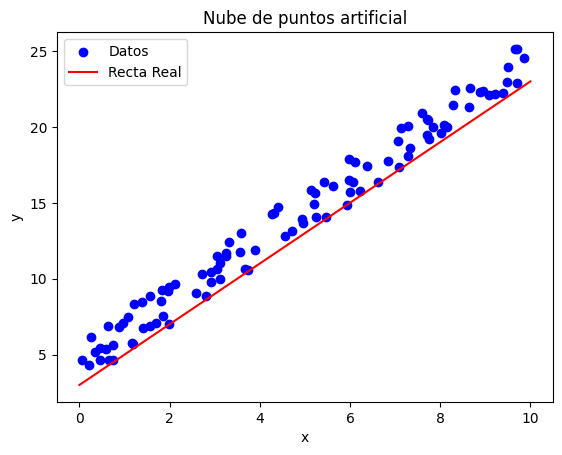

In [25]:
m = 100 #100 puntos
#Generar los valores aleatorios de x entre 0 y 10
x = np.random.rand(m)* 10

#slope & interception
a = 2
b = 3

#Maximas iteraciones
iteraciones_max = 200

sigma = 3 #ruido

y = a*x + b + np.random.rand(m) * sigma

#graficar los datos solo para verlos
plt.scatter(x,y, color='blue', label='Datos')
plt.plot([0,10], [b,a*10+b], color='red', label='Recta Real')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nube de puntos artificial')
plt.legend()
plt.show()

In [26]:
#INICIALIZACIÓN DE CENTROIDES
i=1
centroides = []#Lista de centroides
while i <= k:
    value = random.randint(0,len(x)-1) #1 punto al azar de los 100 que tenemos
    centroides.append([x[value],y[value]])#agregar el punto al diccionario
    i += 1

#Lógica para no repetir centroides

#print centroides
for centroide in centroides:
    print(centroide[0], centroide[1])


2.9214464853521815 9.796903395619953
3.308980248526492 12.392041351888672
1.7052412368729153 7.076805905158021
0.6505159298527952 4.660627961706639


In [27]:
def Calcular_distancia(x_punto,y_punto, centroides):
    distancias = []
    i = 0
    while i < k:
        distancia = (x_punto - centroides[i][0])**2 + (y_punto - centroides[i][1])**2
        distancia = math.sqrt(distancia)
        distancias.append(distancia)
        i += 1
    
    
    
    minima = min(distancias)
    cluster_escogido = distancias.index(minima) 
    return cluster_escogido

In [39]:
#Crear lista de clusters
Clusters = []
i=0
while i < k:
    cluster = [] #Lista de los puntos que se añaden al grupo
    Clusters.append(cluster)
    i += 1
#Añadir puntos a clusters
def Hacer_Clusters(coordenadas_x,coordenadas_y,centroides, Clusters):
    i = 0
    while i < len(coordenadas_x):
        punto = [coordenadas_x[i],coordenadas_y[i]]
        cluster_escogido = Calcular_distancia(coordenadas_x[i],coordenadas_y[i], centroides)
        Clusters[cluster_escogido].append(punto)
        i += 1


    

In [41]:
#Recalcular centroides
for centroide in centroides:
    print(centroide[0], centroide[1])

print('______________')

def Recalcular_Centroides(k, Clusters, centroides):
    suma_x = 0
    suma_y = 0
    i = 0
    while i < k:
        j = 0
        suma_x=0
        suma_y=0
        while j < len(Clusters[i]):
            suma_x += Clusters[i][j][0]
            suma_y += Clusters[i][j][1]
            j+=1
        if len(Clusters[i]) != 0:
            centroides[i][0] = suma_x/(len(Clusters[i]))
            centroides[i][1] = suma_y/(len(Clusters[i]))
        else:
            value = random.randint(0,len(x)-1)
            centroides[i] = [x[value],y[value]]
            
        i+=1



for centroide in centroides:
    print(centroide[0], centroide[1])




4.524317537772145 13.561190954347966
8.029984641716753 20.571437668688006
1.8716621744179895 8.426093664387595
0.5706548057833548 5.172046306095965
______________
4.524317537772145 13.561190954347966
8.029984641716753 20.571437668688006
1.8716621744179895 8.426093664387595
0.5706548057833548 5.172046306095965


In [44]:
def k_means(k,Clusters,centroides,x_punto,y_punto,iteraciones_max):
    i = 0
    while i < iteraciones_max:
        for cluster in Clusters:
            cluster.clear()
        Hacer_Clusters(x_punto, y_punto, centroides, Clusters)
        Recalcular_Centroides(k, Clusters,centroides)
        i+=1
        print(f"Iteración {i+1}:")
        for c in centroides:
            print(c)
